# Projet SUP’TRADING
#### Prédiction des Prix de Clôture des Actions du CAC 40
Ce notebook vise à prédire les prix de clôture des actions du CAC 40 à l'aide d'un modèle de régression linéaire. Nous allons suivre les étapes suivantes :

1. Chargement et exploration des données
2. Préparation des données
3. Entraînement du modèle
4. Évaluation du modèle
5. Interprétation des résultats
6. Calculer les écarts entre les valeurs réelles et prédites 
7. Tracer les valeurs réelles et prédites pour comparaison
8. Suggestions d'amélioration

Imports


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

C:\Users\badi01\AppData\Local\Temp\ipykernel_39380\1649457191.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1. Chargement et Exploration des Données

Nous commençons par charger les données et explorer leur structure.

In [2]:
# Chargement des données
file_path = "cac40_stock_data.csv"
stock_data = pd.read_csv(file_path)

# Afficher les premières lignes des données pour comprendre leur structure
stock_data.head()

FileNotFoundError: [Errno 2] No such file or directory: "C:/Users/badi01/Downloads/ecole/projet d'etude/cac40_stock_data.csv"

Le dataset contient les colonnes suivantes :
- `Date` : La date de l'enregistrement du prix de l'action.
- `Open` : Le prix d'ouverture de l'action.
- `High` : Le prix le plus élevé de l'action pendant la journée.
- `Low` : Le prix le plus bas de l'action pendant la journée.
- `Close` : Le prix de clôture de l'action.
- `Adj Close` : Le prix de clôture ajusté de l'action.
- `Volume` : Le volume d'actions échangées.
- `Stock` : Le symbole boursier de l'action.

## 3. Prétraitement des Données

Nous allons prétraiter les données en gérant les valeurs manquantes, en triant par date et en créant des caractéristiques pour le modèle.


## 2. Préparation des Données

### Sélection de l'Action

Nous allons permettre à l'utilisateur de choisir l'action sur laquelle il souhaite faire des prédictions.

In [ ]:

# Obtenir la liste des actions disponibles
available_stocks = stock_data['Stock'].unique()
print("Actions disponibles :")
for stock in available_stocks:
    print(stock)

# Demander à l'utilisateur de choisir une action
selected_stock = input("Choisissez une action parmi les disponibles : ")

# Vérifier si l'action choisie est valide
if selected_stock not in available_stocks:
    raise ValueError("Action invalide. Veuillez choisir une action valide.")

Actions disponibles :
AC.PA
AI.PA
AIR.PA
ALO.PA
CS.PA
BN.PA
EN.PA
CAP.PA
CA.PA
ACA.PA
BNP.PA
ENGI.PA
EL.PA
RMS.PA
OR.PA
LR.PA
MC.PA
ML.PA
ORA.PA
RI.PA
PUB.PA
RNO.PA
SAF.PA
SGO.PA
SAN.PA
SU.PA
GLE.PA
SW.PA
HO.PA
ATO.PA
VIE.PA
DG.PA
VIV.PA
WLN.PA
KER.PA
FR.PA


### Filtrage et Sélection des Caractéristiques

Nous filtrons les données pour l'action sélectionnée et préparons les caractéristiques (features) et la variable cible (target).

In [ ]:
# Filtrer les données pour l'action sélectionnée
selected_data = stock_data[stock_data['Stock'] == selected_stock]

# Utiliser les colonnes 'Open', 'High', 'Low', 'Volume' comme caractéristiques (features)
# et 'Close' comme variable cible (target)
features = selected_data[['Open', 'High', 'Low', 'Volume']]
target = selected_data['Close']

### Division des Données en Ensembles d'Entraînement et de Test

Nous divisons les données en ensembles d'entraînement et de test pour évaluer notre modèle.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## 3. Entraînement du Modèle

### Choix de l'Algorithme

Nous choisissons un modèle de régression linéaire pour prédire les prix de clôture. La régression linéaire est un bon point de départ pour ce type de problème en raison de sa simplicité et de son interprétabilité.

In [ ]:

# Entraîner un modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 4. Évaluation du Modèle

Nous évaluons le modèle en utilisant des métriques telles que l'erreur quadratique moyenne (MSE) et le coefficient de détermination (R²).

In [ ]:

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Résultats pour l'action {selected_stock} :")
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Coefficient de détermination (R²) : {r2}")

Résultats pour l'action ALO.PA :
Erreur quadratique moyenne (MSE) : 0.06387751634883417
Coefficient de détermination (R²) : 0.9989626683163457


## 5. Interprétation des Résultats

Les résultats obtenus montrent les performances du modèle. Un MSE faible et un R² proche de 1 indiquent une bonne performance.

- **Erreur Quadratique Moyenne (MSE)** : Une MSE faible indique que les prédictions du modèle sont proches des valeurs réelles.
- **Coefficient de Détermination (R²)** : Un R² proche de 1 indique que le modèle explique bien la variance des données.

## 6. Calculer les écarts entre les valeurs réelles et prédites 


In [ ]:
# Calcul les écarts entre les valeurs réelles et prédites
errors = y_test - y_pred

# Création d'un DataFrame pour afficher les valeurs réelles, prédites et les erreurs
comparison_df = pd.DataFrame({
    'Valeurs Réelles': y_test,
    'Valeurs Prédites': y_pred,
    'Erreur': errors
})

# Afficher le DataFrame
display(comparison_df.head(10))

,Valeurs Réelles,Valeurs Prédites,Erreur
2976,12.005000,12.125972,-0.120972
2631,21.330000,21.308431,0.021569
2932,12.210000,11.974444,0.235556
2998,11.695000,11.668026,0.026973
2780,23.770000,23.251378,0.518622
2511,21.010000,21.175559,-0.165559
2404,31.180000,30.826198,0.353803
2643,20.540001,20.473873,0.066128
2875,26.559999,26.546466,0.013533
2455,29.459999,29.734433,-0.274434


## 7. Tracer les valeurs réelles et prédites pour comparaison


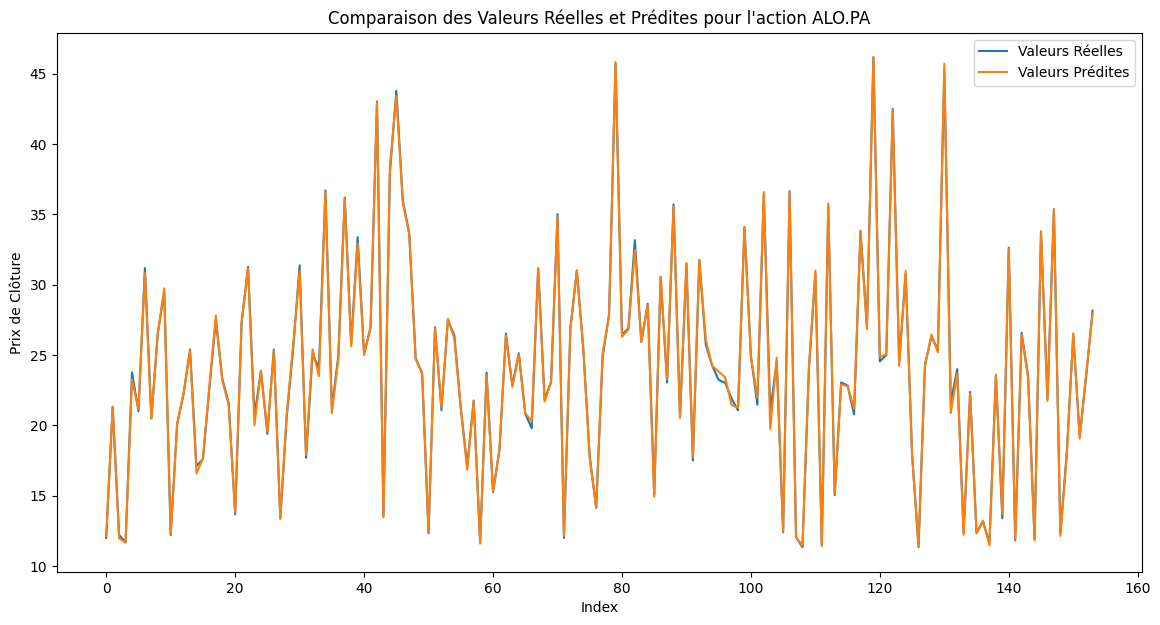

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.reset_index(drop=True), label='Valeurs Réelles')
plt.plot(y_pred, label='Valeurs Prédites')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Prix de Clôture')
plt.title(f'Comparaison des Valeurs Réelles et Prédites pour l\'action {selected_stock}')
plt.show()

### Observations
- Proximité des Courbes : Les courbes des valeurs réelles et prédites sont très proches l'une de l'autre, ce qui indique que le modèle de régression linéaire avec indicateurs techniques a bien capturé la tendance des prix de clôture.
- Alignement des Pics et Creux : Les pics et les creux des courbes prédites suivent de près ceux des valeurs réelles, suggérant que les indicateurs techniques ont aidé à améliorer la précision des prédictions.
- Écart Résiduel : Bien qu'il y ait un bon alignement global, il existe quelques écarts résiduels où les valeurs prédites s'écartent légèrement des valeurs réelles, surtout dans les points de données très volatils.

## 8. Suggestions d'Amélioration

Pour améliorer les performances du modèle, nous pouvons envisager les points suivants :

1. **Ajouter des Caractéristiques** : Inclure des caractéristiques supplémentaires telles que des indicateurs techniques (Moyenne Mobile, RSI, etc.).
2. **Utiliser des Modèles Plus Complexes** : Essayer des modèles plus sophistiqués comme les forêts aléatoires, les réseaux neuronaux ou les modèles de gradient boosting.
3. **Validation Croisée** : Utiliser la validation croisée pour une évaluation plus robuste des performances du modèle.
4. **Tuning des Hyperparamètres** : Ajuster les hyperparamètres des modèles pour optimiser leurs performances.
5. **Données Historiques et Exogènes** : Incorporer des données historiques et des variables exogènes (par exemple, indicateurs macroéconomiques, nouvelles financières).

# Conclusion

Nous avons réussi à prédire les prix de clôture des actions du CAC 40 en utilisant un modèle de régression linéaire. Les résultats sont encourageants, mais il existe plusieurs pistes pour améliorer les performances du modèle. Le choix de l'algorithme, la préparation des données et l'évaluation des performances sont des étapes cruciales dans tout projet de machine learning. Nous pouvons continuer à explorer et affiner ces éléments pour obtenir des prédictions encore plus précises.